In [2]:
import numpy as np
from pylab import *

In [81]:
ev_to_j = 1.60218e-19
hbar = 1.054e-34 #6.582119569e-16
a0 = 5.29e-11
a = 20*a0
V = -13.6 * 1.60218e-19
m = 9.10938356e-31

def even(E):
    return np.sqrt(E-V)*np.tan((a/hbar)*np.sqrt(2*m*(E-V))) - np.sqrt(-E)
def odd(E):
    return -np.sqrt(E-V)*(1/np.tan((a/hbar)*np.sqrt(2*m*(E-V)))) - np.sqrt(-E)

In [118]:
def deriv_even(x):
    dx = 1e-3*ev_to_j
    return (even(x+dx)-even(x-dx))/(2*dx)
def deriv_odd(x):
    dx = 1e-3*ev_to_j
    return (odd(x+dx)-odd(x-dx))/(2*dx)

In [137]:
guess  = np.array([-12.9, -11.8, -10.0, -7.8, -4.5])*ev_to_j
even_sol = []
for g in guess:
#     x = -13.58*ev_to_j
    x = g
    for i in range(100):
        xn = x - even(x)/deriv_even(x)
#         if np.abs(even(xn)) < 1e-4*ev_to_j:
#             even_sol.append(xn/ev_to_j)
        if np.abs(even(x) - even(xn)) < 1e-4*ev_to_j: ## error = 1e-4
            even_sol.append(xn/ev_to_j)
            break
        x = xn
print(even_sol)
        

[-12.915728643005817, -11.702187003344685, -9.889932297679275, -7.4924254322125154, -4.5399502437207335]


In [151]:
guess = np.array([-13.5, -12.5, -11, -9, -6.5, -4.5])*ev_to_j  # initial guess and let algorithm converge
odd_sol = []
for g in guess:
    x = g
    for i in range(1000):
        xn = x - odd(x)/deriv_odd(x)
#         if np.abs(odd(xn)) < 1e-4*ev_to_j:
#             odd_sol.append(xn/ev_to_j)
        if np.abs(odd(xn) - odd(x)) < 1e-4*ev_to_j: ## error = 1e-4
            odd_sol.append(xn/ev_to_j)
            break
        x = xn
print(odd_sol)

[-12.384322034034076, -12.384322034034076, -10.870276768658352, -8.76305579345988, -6.082320919120305, -2.879513140385884]


In [152]:
rcParams.update({'font.size': 15})

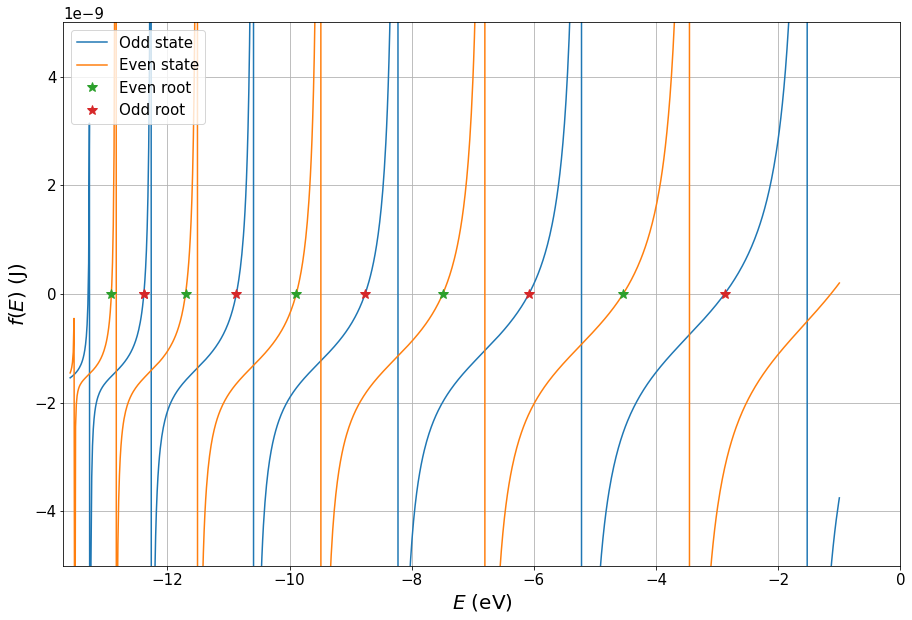

In [153]:
E = np.linspace(-13.59*ev_to_j, -1*ev_to_j, 1000)

figure(figsize=(15,10))
plot(E/ev_to_j,odd(E), label ='Odd state')
plot(E/ev_to_j,even(E), label = 'Even state')
plot(even_sol, np.zeros(len(even_sol)), '*', markersize=10, label ='Even root')
plot(odd_sol, np.zeros(len(odd_sol)), '*' ,markersize=10, label = 'Odd root')

xlabel('$E$ (eV)', fontsize=20)
ylabel('$f(E)$ (J)', fontsize=20)
legend()
ylim([-0.5e-8, 0.5e-8])
xlim([-13.7, 0])
grid('on')



The first solution for the odd state is hard to get because the graph is almost vertical at that point. 